<a href="https://www.kaggle.com/code/subhajeetdas/crop-prediction?scriptVersionId=124743919" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**<h1>Crop Prediction</h1>**

<h2>Library Import</h2>

In [1]:
#For data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive analysis
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crop-icfa-india-dataset/Crop_recommendation.csv


<h2>Load Data</h2>

In [2]:
data = pd.read_csv("/kaggle/input/crop-icfa-india-dataset/Crop_recommendation.csv")
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [3]:
data.shape

(2200, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<h2>Missing Data Checking</h2>

<AxesSubplot:>

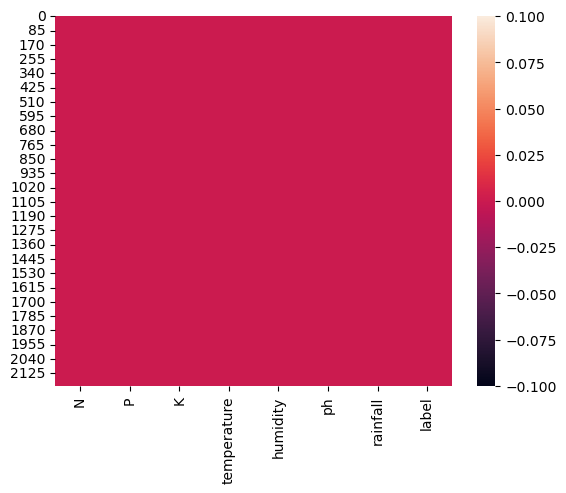

In [5]:
sns.heatmap(data.isnull())

<h2>Season Crops</h2>

<h3>Summer's Crops</h3>

In [6]:
print(data[ (data['temperature']>30) & (data['humidity']>50) ]['label'].unique())

['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


<h3>Monsoon's Crop</h3>

In [7]:
print(data[ (data['rainfall']>200) & (data['humidity']>50) ]['label'].unique())

['rice' 'papaya' 'coconut']


<h3>Winter's Crop</h3>

In [8]:
print(data[ (data['temperature']<20) & (data['humidity']<50) ]['label'].unique())

['chickpea' 'kidneybeans' 'pigeonpeas']


<h2>Crop Wise Requirement</h2>

In [9]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("Minimum Nitrogen Required : ", x['N'].min())
    print("Average Nitrogen Required : ", x['N'].mean())
    print("Maximum Nitrogen Required : ", x['N'].max())

    print("**" * 20)

    print("Minimum Phosphorus Required : ", x['P'].min())
    print("Average Phosphorus Required : ", x['P'].mean())
    print("Maximum Phosphorus Required : ", x['P'].max())

    print("**" * 20)

    print("Minimum Potasium Required : ", x['K'].min())
    print("Average Potasium Required : ", x['K'].mean())
    print("Maximum Potasium Required : ", x['K'].max())

    print("**" * 20)

    print("Minimum PH Required : ", x['ph'].min())
    print("Average PH Required : ", x['ph'].mean())
    print("Maximum PH Required : ", x['ph'].max())

    print("**" * 20)

    print("Minimum Temperature Required : ", x['temperature'].min())
    print("Average Temperature Required : ", x['temperature'].mean())
    print("Maximum Temperature Required : ", x['temperature'].max())

    print("**" * 20)

    print("Minimum Humidity Required : ", x['humidity'].min())
    print("Average Humidity Required : ", x['humidity'].mean())
    print("Maximum Humidity Required : ", x['humidity'].max())

    print("**" * 20)

    print("Minimum Rainfall Required : ", x['rainfall'].min())
    print("Average Rainfall Required : ", x['rainfall'].mean())
    print("Maximum Rainfall Required : ", x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

<h2>Graph for Multi-Varience</h2>

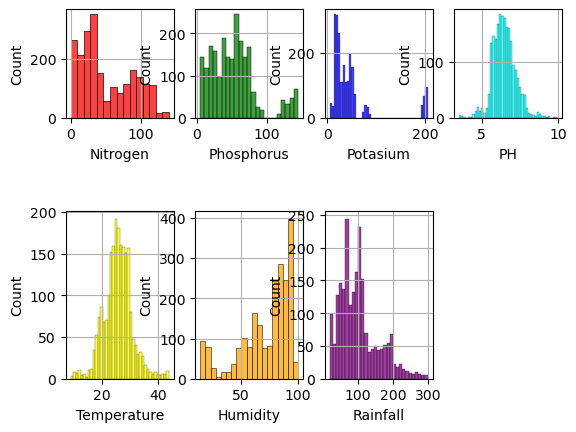

In [10]:
plt.subplot(3,4,1)
sns.histplot(data['N'], color = "Red")
plt.xlabel("Nitrogen")
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color = "Green")
plt.xlabel("Phosphorus")
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color = "Blue")
plt.xlabel("Potasium")
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['ph'], color = "Cyan")
plt.xlabel("PH")
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['temperature'], color = "Yellow")
plt.xlabel("Temperature")
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['humidity'], color = "Orange")
plt.xlabel("Humidity")
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['rainfall'], color = "Purple")
plt.xlabel("Rainfall")
plt.grid()


<h2>Elbow Method to determine Cluster Size</h2>

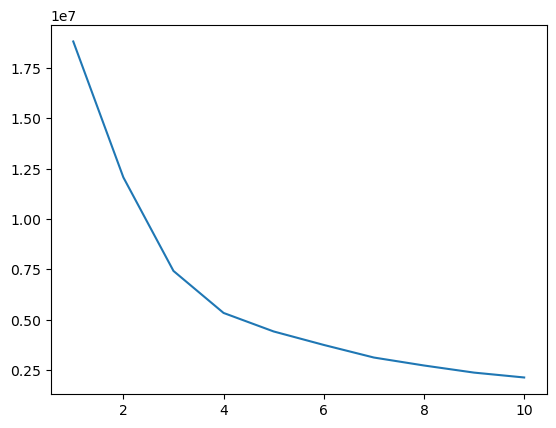

In [11]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

x=data.drop(['label'], axis=1)
x=x.values
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=2000, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.show()

In [12]:
km = KMeans(n_clusters=4, init="k-means++", max_iter=2000, n_init=10, random_state=0)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)

z=z.rename(columns={0:'cluster'})

print("Cluster 1", z[z['cluster'] == 0]['label'].unique())
print("Cluster 2", z[z['cluster'] == 1]['label'].unique())
print("Cluster 3", z[z['cluster'] == 2]['label'].unique())
print("Cluster 4", z[z['cluster'] == 3]['label'].unique())

Cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 3 ['grapes' 'apple']
Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [13]:
y = data['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(np.array([[20, 30, 40, 20, 80, 7, 100]]))

print(y_pred)

['pomegranate']


In [16]:
y_pred = model.predict(x_test)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

<AxesSubplot:>

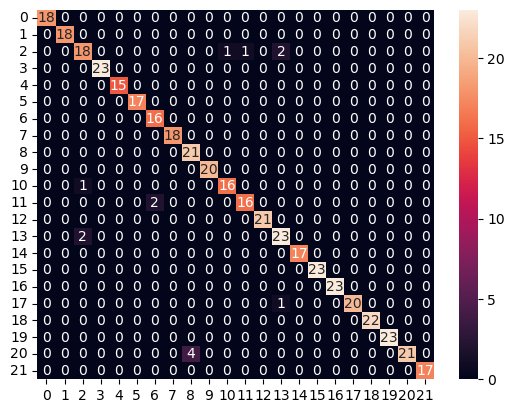

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

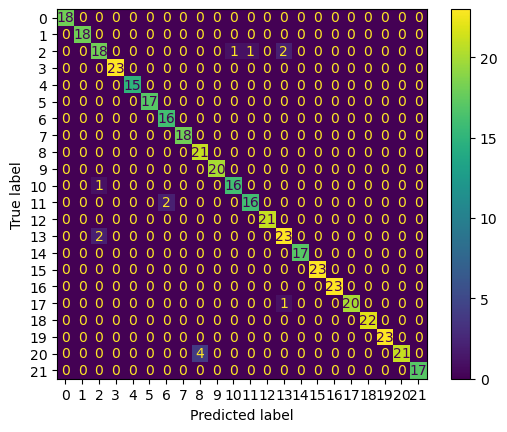

In [18]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()